In [1]:
import warnings
warnings.filterwarnings('ignore')

import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Using TensorFlow backend.


Platform: Darwin-16.6.0-x86_64-i386-64bit
Tensorflow version: 1.4.1
Keras version: 2.1.2


In [ ]:
# intermediate activations

In [2]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [5]:
img_path = 'data/dogs-vs-cats/data/cats_and_dogs_small/test/cats/cat.1701.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)

print("Origin img_tensor shape: ", img_tensor.shape)

img_tensor = np.expand_dims(img_tensor, axis=0) # add one more dimension to match Keras Conv2D

print("After reshape img_tensor shape: ", img_tensor.shape)

img_tensor /= 255.

Origin img_tensor shape:  (150, 150, 3)
After reshape img_tensor shape:  (1, 150, 150, 3)


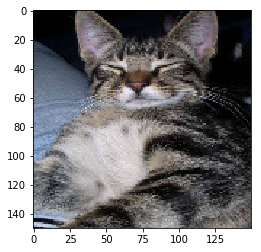

In [6]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [9]:
from keras import models

# saving first 8 layers' outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

layer_outputs

[<tf.Tensor 'conv2d_9/Relu:0' shape=(?, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_10/Relu:0' shape=(?, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_10/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_11/Relu:0' shape=(?, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_11/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_12/Relu:0' shape=(?, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_12/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>]

In [10]:
activations = activation_model.predict(img_tensor)

len(activations)

8

In [11]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


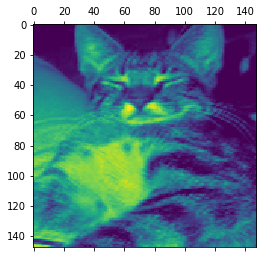

In [12]:
import matplotlib.pyplot as plt
# the 3rd channel
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

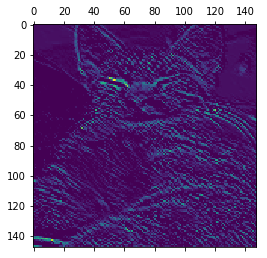

In [23]:
# the 8th channel
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')
plt.show()

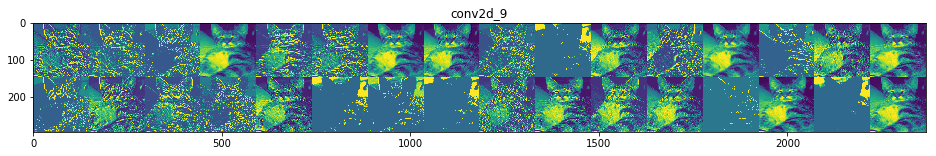

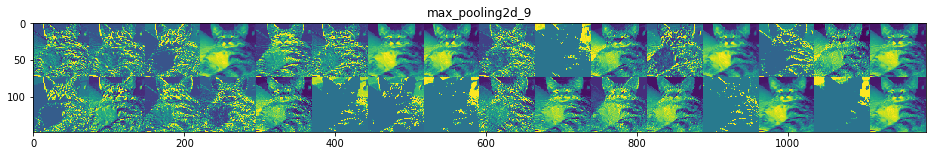

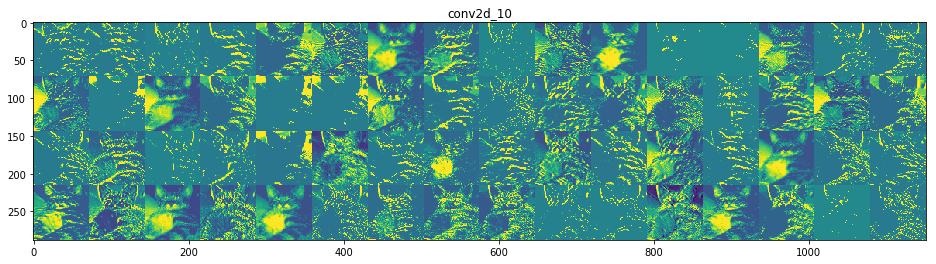

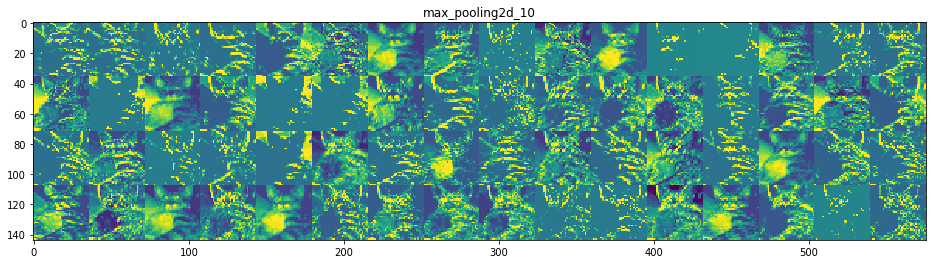

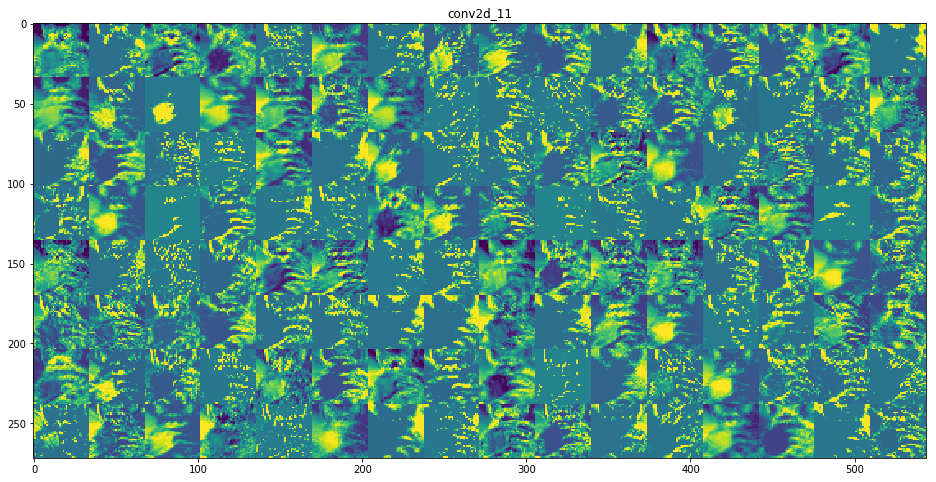

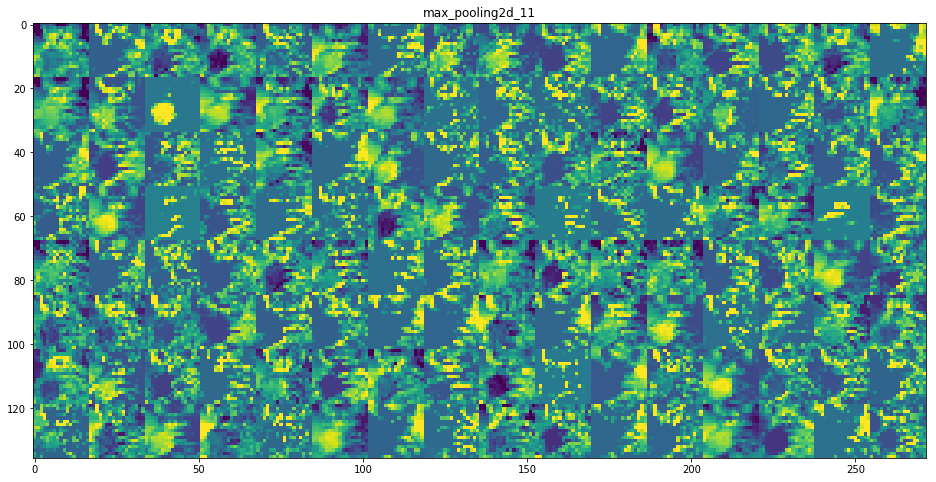

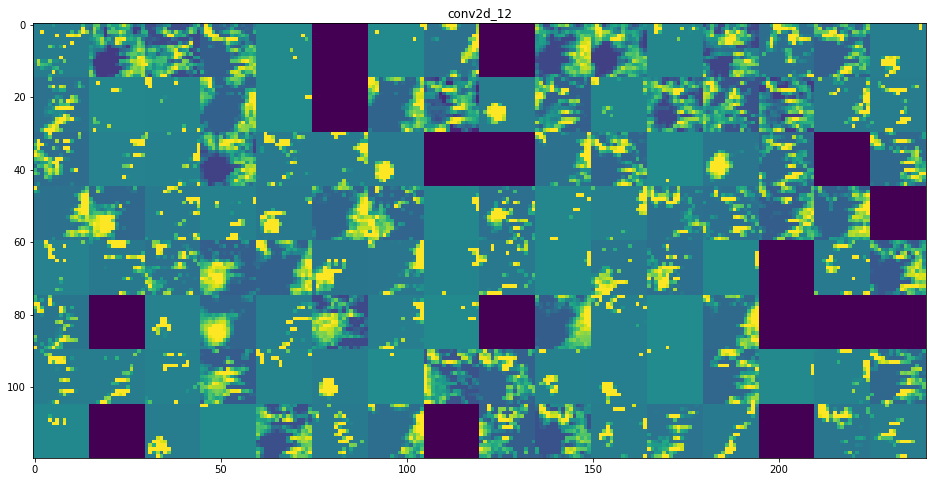

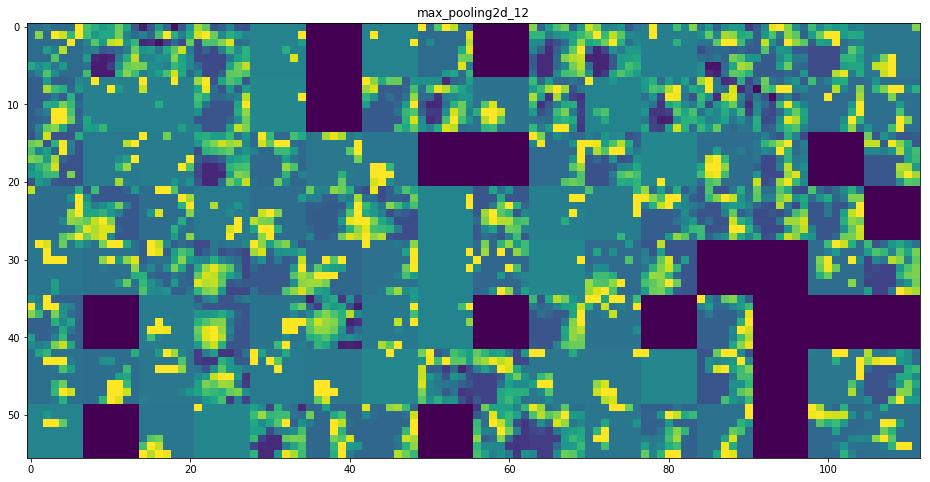

In [25]:
import keras

# print layers' names
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# shapes of every layers
# layer#01 -> (148, 148, 32)
# layer#02 -> (74, 74, 32)
# layer#03 -> (72, 72, 64)
# layer#04 -> (36, 36, 64)
# layer#05 -> (34, 34, 128)
# layer#06 -> (17, 17, 128)
# layer#07 -> (15, 15, 128)
# layer#08 -> (7, 7, 128)

for layer_name, layer_activation in zip(layer_names, activations):
  
    n_features = layer_activation.shape[-1]

    
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [26]:
# see more information at
# http://nbviewer.jupyter.org/github/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/1.6-visualizing-what-convnets-learn.ipynb